[View in Colaboratory](https://colab.research.google.com/github/BikashShaw/MLPractice/blob/master/keras_reuters.ipynb)

Loading the Reuters dataset

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 2s 1us/step


Decoding newswires back to text

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 1us/step


Encoding the data

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Categorical encoding (also known as One-hot encoding)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Model definition

In [0]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compiling the model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Setting aside a validation set

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training the model

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 163us/step - loss: 2.5226 - acc: 0.4959 - val_loss: 1.7188 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.4460 - acc: 0.6884 - val_loss: 1.3510 - val_acc: 0.7030
Epoch 3/20
7982/7982 [==============================] - 1s 146us/step - loss: 1.0982 - acc: 0.7638 - val_loss: 1.1740 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.8704 - acc: 0.8165 - val_loss: 1.0792 - val_acc: 0.7610
Epoch 5/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.7033 - acc: 0.8494 - val_loss: 0.9841 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.5659 - acc: 0.8799 - val_loss: 0.9392 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.4583 - acc: 0.9052 - val_loss: 0.9080 - val_acc: 0.8020


7982/7982 [==============================] - 1s 147us/step - loss: 0.3030 - acc: 0.9318 - val_loss: 0.8910 - val_acc: 0.8060
Epoch 10/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.2539 - acc: 0.9417 - val_loss: 0.9087 - val_acc: 0.8130
Epoch 11/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.2186 - acc: 0.9471 - val_loss: 0.9164 - val_acc: 0.8110
Epoch 12/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.1876 - acc: 0.9511 - val_loss: 0.9055 - val_acc: 0.8150
Epoch 13/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.1703 - acc: 0.9526 - val_loss: 0.9352 - val_acc: 0.8060
Epoch 14/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.1535 - acc: 0.9560 - val_loss: 0.9656 - val_acc: 0.8050
Epoch 15/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.1394 - acc: 0.9559 - val_loss: 0.9715 - val_acc: 0.8150
Epoch 16/20
7982/7982 [==============================

7982/7982 [==============================] - 1s 146us/step - loss: 0.1200 - acc: 0.9572 - val_loss: 1.0451 - val_acc: 0.8030
Epoch 19/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.1143 - acc: 0.9592 - val_loss: 1.1003 - val_acc: 0.7960
Epoch 20/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.1120 - acc: 0.9595 - val_loss: 1.0733 - val_acc: 0.8000


Plotting the training and validation loss

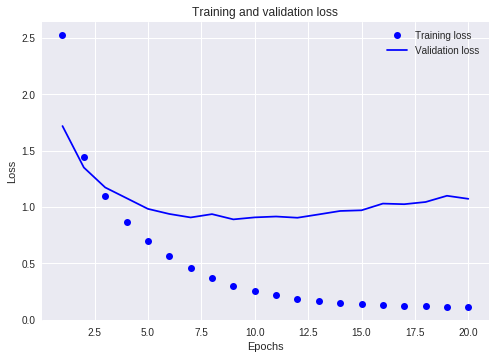

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the training and validation accuracy

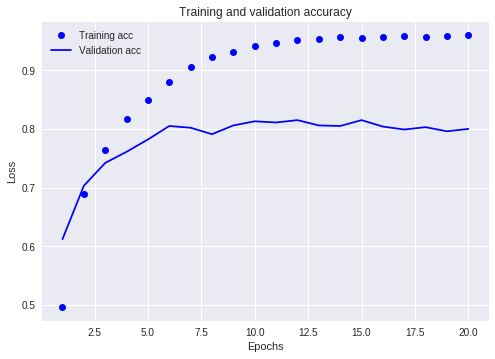

In [15]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Retraining a model from scratch

In [16]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 153us/step - loss: 2.5308 - acc: 0.5234 - val_loss: 1.6804 - val_acc: 0.6540
Epoch 2/9
7982/7982 [==============================] - 1s 132us/step - loss: 1.3736 - acc: 0.7134 - val_loss: 1.2826 - val_acc: 0.7240
Epoch 3/9
7982/7982 [==============================] - 1s 146us/step - loss: 1.0194 - acc: 0.7793 - val_loss: 1.1382 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.8037 - acc: 0.8244 - val_loss: 1.0572 - val_acc: 0.7570
Epoch 5/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.6446 - acc: 0.8622 - val_loss: 0.9812 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.5158 - acc: 0.8908 - val_loss: 0.9125 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.4150 - acc: 0.9139 - val_loss: 0.8971 - val_acc: 0.8210
Epoch 8

2246/2246 [==============================] - 0s 128us/step
[1.0211804550031627, 0.7769367765446168]
